In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

In [18]:
#Data_set = np.loadtxt("./ThoraricSurgery.csv",delimiter=",")

Data_set = np.loadtxt(r"C:\Users\virtue\Desktop\머신러닝\dataset\ThoraricSurgery.csv",delimiter=",")

In [22]:
type(Data_set)

numpy.ndarray

In [19]:
X = Data_set[:,0:17]
Y = Data_set[:,17]

In [20]:
model =Sequential()
model.add(Dense(30, input_dim=17, activation='relu')) 
# 층하나를 만드는것,첫번째 hidden layer 30개(임의지정), input_dim=17(x피쳐가 17개), 연결선이 510개
# relu: 은닉층 함수,-값을 0으로 만들어줌
model.add(Dense(1, activation='sigmoid')) # 마지막 덴스 출력층,input_dim 전에 함수꺼(30)로 출력해라 생략

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.fit(X,Y, epochs=100, batch_size=10)
# epochs : matrix값, 모델은 고정하고 성능 케이스별로 측정을 몇번 수행하느냐 
# batch_size :10개씩 돌리겠다

Epoch 1/100
47/47 [==============================] - 1s 1ms/step - loss: 4.9696 - accuracy: 0.5787
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 1.4005 - accuracy: 0.7447
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 1.0353 - accuracy: 0.7787
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.8037 - accuracy: 0.8000
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.8213
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 0.5010 - accuracy: 0.8277
Epoch 7/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4901 - accuracy: 0.8404
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.8511
Epoch 9/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.8468
Epoch 10/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8468
Epoch 11/

47/47 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.8447
Epoch 84/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8383
Epoch 85/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8489
Epoch 86/100
47/47 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8447
Epoch 87/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8340
Epoch 88/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4028 - accuracy: 0.8426
Epoch 89/100
47/47 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8511
Epoch 90/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8574
Epoch 91/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.8511
Epoch 92/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.8553
Epoch 93/100


## 피마인디언 당뇨병 예측 실습

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv(r"C:\Users\virtue\Desktop\머신러닝\dataset\pima-indians-diabetes.csv",
                names = ["pregnant", "plasma", "pressure", "thinkness", "insulin", "BMI", "pedigree", "age","class"])

In [27]:
print(df.head(5))

   pregnant  plasma  pressure  thinkness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thinkness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [29]:
print(df.describe())

         pregnant      plasma    pressure   thinkness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [30]:
print(df[['pregnant', 'class']]) # 판다스니깐 리스트 만들어서 출력

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [32]:
df[['pregnant', 'class']].groupby(['pregnant'], as_index = False)['class'].mean().sort_values(by='pregnant',ascending=True)

# as_index = False 새로운 인덱스

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


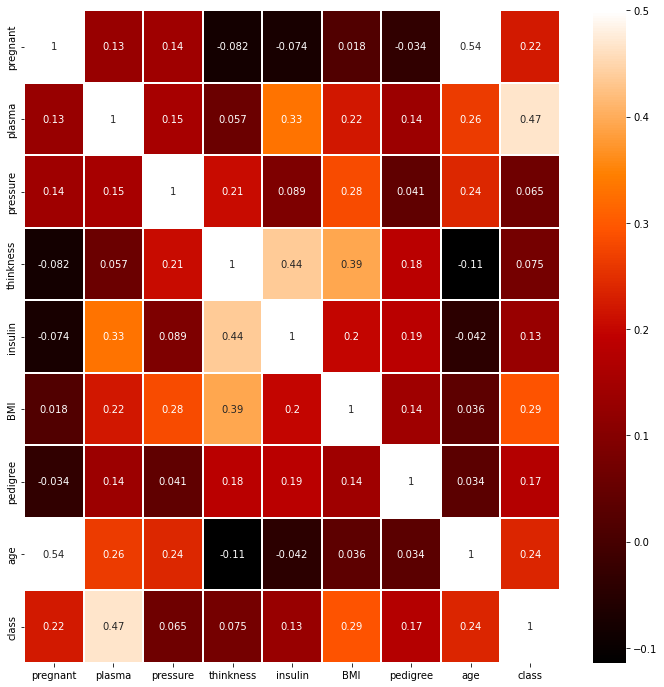

In [35]:
colormap = plt.cm.gist_heat 
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=colormap, linecolor='white', annot=True)

plt.show()

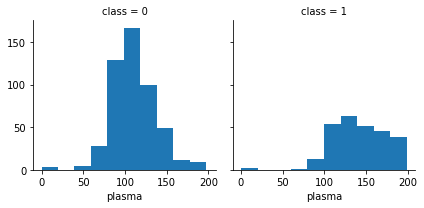

In [34]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [65]:
dataset = np.loadtxt(r"C:\Users\virtue\Desktop\머신러닝\dataset\pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8].astype(float)
Y = dataset[:,8].astype(float)


In [66]:
# 모델 설정
# input -> 12 -> 8 -> output

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [67]:
#  모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
77/77 [==============================] - 1s 1ms/step - loss: 7.1566 - accuracy: 0.5651
Epoch 2/200
77/77 [==============================] - 0s 1ms/step - loss: 1.6323 - accuracy: 0.5846
Epoch 3/200
77/77 [==============================] - 0s 1ms/step - loss: 0.9874 - accuracy: 0.6471
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8541 - accuracy: 0.6536
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8111 - accuracy: 0.6576
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7894 - accuracy: 0.6589
Epoch 7/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7337 - accuracy: 0.6849
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7314 - accuracy: 0.6888
Epoch 9/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7194 - accuracy: 0.6719
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7160 - accuracy: 0.6732
Epoch 11/

77/77 [==============================] - 0s 1ms/step - loss: 0.5404 - accuracy: 0.7461
Epoch 84/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5313 - accuracy: 0.7448
Epoch 85/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5512 - accuracy: 0.7422
Epoch 86/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5261 - accuracy: 0.7357
Epoch 87/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5506 - accuracy: 0.7292
Epoch 88/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5458 - accuracy: 0.7318
Epoch 89/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.7201
Epoch 90/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5430 - accuracy: 0.7357
Epoch 91/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5275 - accuracy: 0.7305
Epoch 92/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5341 - accuracy: 0.7435
Epoch 93/200


77/77 [==============================] - 0s 1ms/step - loss: 0.5524 - accuracy: 0.7318
Epoch 165/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7656
Epoch 166/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5112 - accuracy: 0.7552
Epoch 167/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7513
Epoch 168/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5047 - accuracy: 0.7617
Epoch 169/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.7474
Epoch 170/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7747
Epoch 171/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.7617
Epoch 172/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7461
Epoch 173/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.7721
Epoc

In [69]:
# 결과출력
print("\n Accuracy: %.4f" % (model.evaluate(X,Y)[1]))

24/24 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.7526

 Accuracy: 0.7526
